In [1]:
import pandas as pd

#Loading Dataset
df = pd.read_csv("./datasets/legal_text_classification.csv")
df.head(5)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


,case_id,case_outcome,case_title,case_text
count,24985,24985,24985,24809
unique,24985,10,18581,17920
top,Case1,cited,Minister for Immigration and Ethnic Affairs v ...,submitted that this Court should hold that the...
freq,1,12219,70,42


In [3]:
# Drop rows with null values in 'case_text'
df = df.dropna(subset=['case_text'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24809 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24809 non-null  object
 1   case_outcome  24809 non-null  object
 2   case_title    24809 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 969.1+ KB
None


In [4]:
#Check if there are balenced classes
number_classes = df["case_outcome"].value_counts()
print(number_classes)

cited            12110
referred to       4363
applied           2438
followed          2252
considered        1699
discussed         1018
distinguished      603
related            112
approved           108
affirmed           106
Name: case_outcome, dtype: int64


In [5]:
#Checking Case_text number of TOKEN lenght

# Split the text samples into tokens and calculate the number of tokens in each text
num_token = df['case_text'].str.split()
token_count = num_token.apply(lambda x: len(x))

print(token_count.describe(percentiles=[0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99]))
print(token_count.info())


count    24809.000000
mean       454.909791
std       1143.224035
min         17.000000
25%        147.000000
50%        244.000000
75%        436.000000
80%        510.000000
90%        792.000000
95%       1192.600000
99%       3386.840000
max      22466.000000
Name: case_text, dtype: float64
<class 'pandas.core.series.Series'>
Int64Index: 24809 entries, 0 to 24984
Series name: case_text
Non-Null Count  Dtype
--------------  -----
24809 non-null  int64
dtypes: int64(1)
memory usage: 387.6 KB
None


In [6]:
max_token = token_count.max()
max_token_id = token_count.idxmax()
print(f'maximum value of tokens for a single sample {max_token}')
print(f'id of maximum value for sample {max_token_id}\n')

#maximum lenght case_text sample
#print(df['case_text'].loc[max_token_id])

maximum value of tokens for a single sample 22466
id of maximum value for sample 14534



In [7]:
#condition for selection
X = df['case_text']
under_510 = X[token_count <= 510].index
over_510  = X[token_count > 510].index

#removing case_text longer tha 510 token
df_train_temp = df.loc[under_510]
df_test_temp = df.loc[over_510]

print(f'all samples equal or under 510 token{df_train_temp.shape}')
print(f'all samples over 510 token{df_test_temp.shape}')
print(f'all samples {df.shape}')

# check  token statistics
#check_num = X_train_temp.str.split()
#token_check = check_num.apply(lambda x: len(x))
#print(token_check.describe())

under_510_outcome_dist = df_train_temp["case_outcome"].value_counts()
over_510_outcome_dist = df_test_temp["case_outcome"].value_counts()

#check under_510 and over_510 token respect to case_outcome distribution
print(f'\n class distribution in data with token equal or under 510:\n {under_510_outcome_dist}')
print(f'\n class distribution in data with token over 510:\n {over_510_outcome_dist}')

all samples equal or under 510 token(19853, 4)
all samples over 510 token(4956, 4)
all samples (24809, 4)

 class distribution in data with token equal or under 510:
 cited            10363
referred to       3712
followed          1674
applied           1670
considered        1137
discussed          619
distinguished      427
related             86
affirmed            85
approved            80
Name: case_outcome, dtype: int64

 class distribution in data with token over 510:
 cited            1747
applied           768
referred to       651
followed          578
considered        562
discussed         399
distinguished     176
approved           28
related            26
affirmed           21
Name: case_outcome, dtype: int64


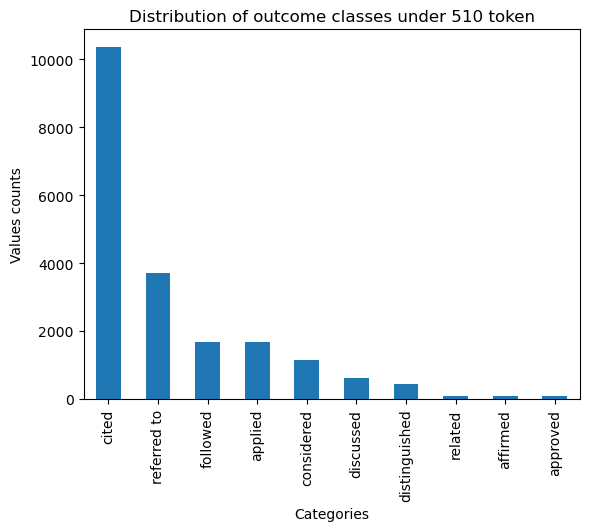

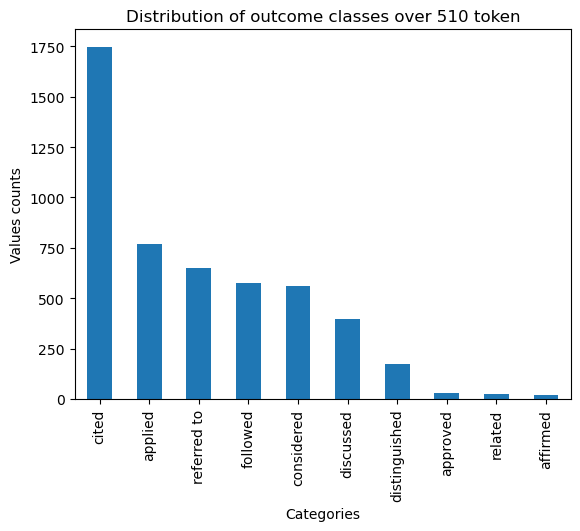

In [8]:
import matplotlib.pyplot as plt

#visualazing distributions

#under_510
# Create the bar chart
under_510_outcome_dist.plot(kind='bar', x='Category', y='Values', legend=False)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values counts')
plt.title('Distribution of outcome classes under 510 token')

# Show the plot
plt.show()

#over_510
# Create the bar chart
over_510_outcome_dist.plot(kind='bar', x='Category', y='Values', legend=False)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values counts')
plt.title('Distribution of outcome classes over 510 token')

# Show the plot
plt.show()

# 1 approach, i will train on token under 510 and i will test on token over 510


In [9]:
df_train_temp = df_train_temp.drop(columns =['case_id', 'case_title'])
df_train_temp.rename(columns={"case_text":"text", "case_outcome":"label"}, inplace= True)
print(df_train_temp.head(5))

df_test_temp = df_test_temp.drop(columns =['case_id', 'case_title'])
df_test_temp.rename(columns={"case_text":"text", "case_outcome":"label"}, inplace= True)
print(df_test_temp.head(5))

   label                                               text
0  cited  Ordinarily that discretion will be exercised s...
1  cited  The general principles governing the exercise ...
2  cited  Ordinarily that discretion will be exercised s...
3  cited  The general principles governing the exercise ...
4  cited  The preceding general principles inform the ex...
          label                                               text
7         cited  On the question of the level of unreasonablene...
15     followed  None of this is to suggest that the Deputy Com...
18  referred to  am satisfied that the finding of the third Tri...
33        cited  It is not a necessary consequence of an order ...
34   considered  In Australian Securities and Investments Commi...


In [10]:
#splitting in training and test set
from datasets import Dataset, ClassLabel

# Convert the DataFrame into a Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train_temp)
test_dataset = Dataset.from_pandas(df_test_temp)

# Dividing in train and test
train_valid = train_dataset.train_test_split(test_size=0.2)
print(train_valid)
train_valid.set_format("pt")

train = train_valid["train"]
valid = train_valid["test"]
print(train)



DatasetDict({
    train: Dataset({
        features: ['label', 'text', '__index_level_0__'],
        num_rows: 15882
    })
    test: Dataset({
        features: ['label', 'text', '__index_level_0__'],
        num_rows: 3971
    })
})
Dataset({
    features: ['label', 'text', '__index_level_0__'],
    num_rows: 15882
})


In [11]:
import time
from transformers import BertForSequenceClassification, BertTokenizer
import torch
from transformers import TrainingArguments, Trainer, logging
from accelerate import Accelerator
from sklearn.metrics import f1_score

In [12]:
#time and GPU statistics
from pynvml import *

def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")


def print_summary(result):
    print(f"Time: {result.metrics['train_runtime']:.2f}")
    print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
    print_gpu_utilization()


In [13]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="macro")
    return {"f1": f1}

def legal_bert_textclf_train(train_data, valid_data):
    
    #default arguments for training
    default_args = {
        "output_dir": "tmp",
        "evaluation_strategy": "steps",
        "num_train_epochs": 1,
        "log_level": "error",
        "report_to": "none",
    }
    
    # Transformer settings
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'GPU on: {torch.cuda.is_available()}')
    model_ckpt= 'nlpaueb/bert-base-uncased-eurlex'
    
    # Get the number of unique labels, pretrained model anf device
    labels_list = df_train_temp["label"].unique().tolist()
    
    # Loading model and tokenaizer
    tokenizer = BertTokenizer.from_pretrained(model_ckpt)
    model = BertForSequenceClassification.from_pretrained(model_ckpt, num_labels = len(labels_list)).to(device)
    
    

    
    #tokenizing samples
    def tokenization(sample):
        # Obtain unique label
        
        #tokenize text
        tokenized_sample = tokenizer(sample['text'], padding=True, truncation=True, max_length=512)
        
        #encode label
        labels = ClassLabel(names=labels_list)
        tokenized_sample["label"] = labels.str2int(sample['label'])
        return tokenized_sample
    
    
    train_token = train_data.map(tokenization, batched=True)
    eval_token  = valid_data.map(tokenization, batched= True)
    
    # Training
    logging.set_verbosity_error()

    training_args = TrainingArguments(per_device_train_batch_size=4, **default_args)
    trainer = Trainer(model=model, args=training_args, train_dataset=train_token, eval_dataset=eval_token, compute_metrics=compute_metrics)
    result = trainer.train()
    
    # Saving Model
    model_name = model_ckpt.replace("/", "_")
    pt_save_directory = f"./models/{model_name}"
    model.save_pretrained(pt_save_directory)
    
    #print model GPU summary
    print_summary(result)
    
    return model_ckpt.replace("/", "_"), labels_list

In [14]:
# Record the start time
start_time = time.time()

# Call your function
file, labels_list = legal_bert_textclf_train(train, valid)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

file_path = f'./models/{file}.txt'  # Replace with the path to your desired file
with open(file_path, 'w') as file:
    # Write data to the file
    file.write(f"{file:}\n")
    file.write(f"Execution Time: {execution_time} seconds\n")
    file.write(f"List of all Labels: {labels_list}\n")

print("Execution Time:", execution_time, "seconds")

GPU on: True


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/bert-base-uncased-eurlex and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15882 [00:00<?, ? examples/s]

Map:   0%|          | 0/3971 [00:00<?, ? examples/s]

C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5382, 'learning_rate': 4.370435658524301e-05, 'epoch': 0.13}
{'eval_loss': 1.5401450395584106, 'eval_f1': 0.06822631491621038, 'eval_runtime': 76.9225, 'eval_samples_per_second': 51.623, 'eval_steps_per_second': 6.461, 'epoch': 0.13}
{'loss': 1.5283, 'learning_rate': 3.740871317048602e-05, 'epoch': 0.25}
{'eval_loss': 1.5284371376037598, 'eval_f1': 0.06822631491621038, 'eval_runtime': 76.118, 'eval_samples_per_second': 52.169, 'eval_steps_per_second': 6.529, 'epoch': 0.25}
{'loss': 1.5045, 'learning_rate': 3.111306975572904e-05, 'epoch': 0.38}
{'eval_loss': 1.5424306392669678, 'eval_f1': 0.06822631491621038, 'eval_runtime': 76.1308, 'eval_samples_per_second': 52.16, 'eval_steps_per_second': 6.528, 'epoch': 0.38}
{'loss': 1.5253, 'learning_rate': 2.481742634097205e-05, 'epoch': 0.5}
{'eval_loss': 1.5271141529083252, 'eval_f1': 0.06822631491621038, 'eval_runtime': 76.1723, 'eval_samples_per_second': 52.132, 'eval_steps_per_second': 6.525, 'epoch': 0.5}
{'loss': 1.4616, 'learni

In [24]:
import optuna

In [26]:
# model selection(optimizing) with optuna
def model_init():
    labels_list = df_train_temp["label"].unique().tolist()
    model_ckpt= 'nlpaueb/bert-base-uncased-eurlex'
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'GPU on: {torch.cuda.is_available()}')
    return (BertForSequenceClassification.from_pretrained(model_ckpt, num_labels = len(labels_list)).to(device))

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="macro")
    return {"f1": f1}

#model
def legal_bert_textclf(train_data, valid_data):
    
    #default arguments for training
    default_args = {
        "output_dir": "tmp",
        "evaluation_strategy": "steps",
        "log_level": "error",
        "report_to": "none",
    }
    
    # Transformer settings
    
    model_ckpt= 'nlpaueb/bert-base-uncased-eurlex'
    
    # Get the number of unique labels, pretrained model anf device
    labels_list = df_train_temp["label"].unique().tolist()
    
    # Loading model and tokenaizer
    tokenizer = BertTokenizer.from_pretrained(model_ckpt)
    model = model_init() 
    
    #tokenizing samples
    def tokenization(sample):
        # Obtain unique label
        
        #tokenize text
        tokenized_sample = tokenizer(sample['text'], padding=True, truncation=True, max_length=512)
        
        #encode label
        labels = ClassLabel(names=labels_list)
        tokenized_sample["label"] = labels.str2int(sample['label'])
        return tokenized_sample
    
    
    train_token = train_data.map(tokenization, batched=True)
    eval_token  = valid_data.map(tokenization, batched= True)
     # Training
    logging.set_verbosity_error()

    training_args = TrainingArguments(per_device_train_batch_size=4, **default_args)
    trainer = Trainer(model_init=model_init, args=training_args, train_dataset=train_token, eval_dataset=eval_token, compute_metrics=compute_metrics)
    
    return model, trainer

model, trainer = legal_bert_textclf(train, valid)

#hiperparam search
def hp_space(trial):
    return {"num_trial_epochs": trial.suggest_int("num_trial_epochs", 3, 4),
            "learning_rate":trial.suggest_float("learning_rate", 0.00002, 0.00005),
            "batch_size": trial.suggest_int("batch_size", 16, 32)}

#optimizazion
best_run = trainer.hyperparameter_search(n_trials=20, direction="maximize", hp_space=hp_space)
print(best_run)

# BestRun(run_id='10', objective=0.34473815452156187,
#  hyperparameters={'num_trial_epochs': 3, 'learning_rate': 2.2303462863679452e-05, 'batch_size': 27}, run_summary=None)

GPU on: True


Map:   0%|          | 0/15882 [00:00<?, ? examples/s]

Map:   0%|          | 0/3971 [00:00<?, ? examples/s]

GPU on: True


[I 2023-07-30 15:52:08,325] A new study created in memory with name: no-name-f9d6096a-157c-49c7-b08a-d5298b43bb66


GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5094, 'learning_rate': 3.5319461094383905e-05, 'epoch': 0.13}
{'eval_loss': 1.4877976179122925, 'eval_f1': 0.06872727272727272, 'eval_runtime': 77.7481, 'eval_samples_per_second': 51.075, 'eval_steps_per_second': 6.392, 'epoch': 0.13}
{'loss': 1.5204, 'learning_rate': 3.377212642802169e-05, 'epoch': 0.25}
{'eval_loss': 1.5012670755386353, 'eval_f1': 0.06872727272727272, 'eval_runtime': 77.5666, 'eval_samples_per_second': 51.195, 'eval_steps_per_second': 6.407, 'epoch': 0.25}
{'loss': 1.5185, 'learning_rate': 3.222479176165947e-05, 'epoch': 0.38}
{'eval_loss': 1.5169566869735718, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.4744, 'eval_samples_per_second': 44.883, 'eval_steps_per_second': 5.617, 'epoch': 0.38}
{'loss': 1.5348, 'learning_rate': 3.067745709529726e-05, 'epoch': 0.5}
{'eval_loss': 1.4878863096237183, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.5956, 'eval_samples_per_second': 44.822, 'eval_steps_per_second': 5.61, 'epoch': 0.5}
{'loss': 1.5459, 'lear

[I 2023-07-30 17:21:47,974] Trial 0 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 3, 'learning_rate': 3.686679576074612e-05, 'batch_size': 23}. Best is trial 0 with value: 0.06872727272727272.


{'train_runtime': 5378.1502, 'train_samples_per_second': 8.859, 'train_steps_per_second': 2.215, 'train_loss': 1.508405595925276, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5098, 'learning_rate': 4.380425437934969e-05, 'epoch': 0.13}
{'eval_loss': 1.5332114696502686, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.2838, 'eval_samples_per_second': 43.984, 'eval_steps_per_second': 5.505, 'epoch': 0.13}
{'loss': 1.5238, 'learning_rate': 4.1885203543489283e-05, 'epoch': 0.25}
{'eval_loss': 1.51582670211792, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.1954, 'eval_samples_per_second': 44.027, 'eval_steps_per_second': 5.51, 'epoch': 0.25}
{'loss': 1.535, 'learning_rate': 3.9966152707628874e-05, 'epoch': 0.38}
{'eval_loss': 1.5169711112976074, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.7499, 'eval_samples_per_second': 44.744, 'eval_steps_per_second': 5.6, 'epoch': 0.38}
{'loss': 1.546, 'learning_rate': 3.804710187176847e-05, 'epoch': 0.5}
{'eval_loss': 1.5065213441848755, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.8558, 'eval_samples_per_second': 44.69, 'eval_steps_per_second': 5.593, 'epoch': 0.5}
{'loss': 1.5473, 'learning_r

[I 2023-07-30 18:52:11,308] Trial 1 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 3, 'learning_rate': 4.57233052152101e-05, 'batch_size': 16}. Best is trial 0 with value: 0.06872727272727272.


{'train_runtime': 5421.6676, 'train_samples_per_second': 8.788, 'train_steps_per_second': 2.197, 'train_loss': 1.5115223134243447, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5112, 'learning_rate': 3.856361305244734e-05, 'epoch': 0.13}
{'eval_loss': 1.4899280071258545, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.5023, 'eval_samples_per_second': 43.877, 'eval_steps_per_second': 5.492, 'epoch': 0.13}
{'loss': 1.5235, 'learning_rate': 3.687415309220695e-05, 'epoch': 0.25}
{'eval_loss': 1.519321322441101, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.7063, 'eval_samples_per_second': 44.766, 'eval_steps_per_second': 5.603, 'epoch': 0.25}
{'loss': 1.5331, 'learning_rate': 3.5184693131966544e-05, 'epoch': 0.38}
{'eval_loss': 1.517182469367981, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.8873, 'eval_samples_per_second': 44.675, 'eval_steps_per_second': 5.591, 'epoch': 0.38}
{'loss': 1.5479, 'learning_rate': 3.3495233171726146e-05, 'epoch': 0.5}
{'eval_loss': 1.5074303150177002, 'eval_f1': 0.06872727272727272, 'eval_runtime': 87.2402, 'eval_samples_per_second': 45.518, 'eval_steps_per_second': 5.697, 'epoch': 0.5}
{'loss': 1.5477, 'lear

[I 2023-07-30 20:22:26,857] Trial 2 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 4, 'learning_rate': 4.025307301268774e-05, 'batch_size': 31}. Best is trial 0 with value: 0.06872727272727272.


{'train_runtime': 5413.5814, 'train_samples_per_second': 8.801, 'train_steps_per_second': 2.201, 'train_loss': 1.5102642811506468, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5053, 'learning_rate': 2.7792273342912735e-05, 'epoch': 0.13}
{'eval_loss': 1.5041524171829224, 'eval_f1': 0.0687169312169312, 'eval_runtime': 89.983, 'eval_samples_per_second': 44.131, 'eval_steps_per_second': 5.523, 'epoch': 0.13}
{'loss': 1.5044, 'learning_rate': 2.657470244381028e-05, 'epoch': 0.25}
{'eval_loss': 1.4833824634552002, 'eval_f1': 0.07025812943071137, 'eval_runtime': 89.9513, 'eval_samples_per_second': 44.146, 'eval_steps_per_second': 5.525, 'epoch': 0.25}
{'loss': 1.4959, 'learning_rate': 2.5357131544707816e-05, 'epoch': 0.38}
{'eval_loss': 1.4734350442886353, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.9707, 'eval_samples_per_second': 44.137, 'eval_steps_per_second': 5.524, 'epoch': 0.38}
{'loss': 1.4917, 'learning_rate': 2.413956064560536e-05, 'epoch': 0.5}
{'eval_loss': 1.440989375114441, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.9886, 'eval_samples_per_second': 44.128, 'eval_steps_per_second': 5.523, 'epoch': 0.5}
{'loss': 1.4818, 'learn

[I 2023-07-30 21:53:48,355] Trial 3 finished with value: 0.33702616029736776 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.9009844242015197e-05, 'batch_size': 24}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5479.5915, 'train_samples_per_second': 8.695, 'train_steps_per_second': 2.174, 'train_loss': 1.277045214155164, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5083, 'learning_rate': 4.273899880476005e-05, 'epoch': 0.13}
{'eval_loss': 1.5209425687789917, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.7, 'eval_samples_per_second': 44.27, 'eval_steps_per_second': 5.541, 'epoch': 0.13}
{'loss': 1.5235, 'learning_rate': 4.086661648614268e-05, 'epoch': 0.25}
{'eval_loss': 1.516805648803711, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.9442, 'eval_samples_per_second': 45.673, 'eval_steps_per_second': 5.716, 'epoch': 0.25}
{'loss': 1.5363, 'learning_rate': 3.899423416752531e-05, 'epoch': 0.38}
{'eval_loss': 1.5171172618865967, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.9496, 'eval_samples_per_second': 45.67, 'eval_steps_per_second': 5.716, 'epoch': 0.38}
{'loss': 1.546, 'learning_rate': 3.712185184890794e-05, 'epoch': 0.5}
{'eval_loss': 1.5062698125839233, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.8199, 'eval_samples_per_second': 45.738, 'eval_steps_per_second': 5.724, 'epoch': 0.5}
{'loss': 1.5475, 'learning_ra

[I 2023-07-30 23:23:50,027] Trial 4 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 3, 'learning_rate': 4.4611381123377416e-05, 'batch_size': 18}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5399.9818, 'train_samples_per_second': 8.823, 'train_steps_per_second': 2.206, 'train_loss': 1.511507978129525, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5096, 'learning_rate': 3.643805413617155e-05, 'epoch': 0.13}
{'eval_loss': 1.4928205013275146, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.4984, 'eval_samples_per_second': 44.37, 'eval_steps_per_second': 5.553, 'epoch': 0.13}
{'loss': 1.5229, 'learning_rate': 3.484171425462544e-05, 'epoch': 0.25}
{'eval_loss': 1.5218861103057861, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.8442, 'eval_samples_per_second': 44.696, 'eval_steps_per_second': 5.594, 'epoch': 0.25}
{'loss': 1.5306, 'learning_rate': 3.324537437307933e-05, 'epoch': 0.38}
{'eval_loss': 1.5251365900039673, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.8593, 'eval_samples_per_second': 44.689, 'eval_steps_per_second': 5.593, 'epoch': 0.38}
{'loss': 1.5421, 'learning_rate': 3.164903449153322e-05, 'epoch': 0.5}
{'eval_loss': 1.50568425655365, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.172, 'eval_samples_per_second': 46.082, 'eval_steps_per_second': 5.768, 'epoch': 0.5}
{'loss': 1.5456, 'learning

[I 2023-07-31 00:53:20,108] Trial 5 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 4, 'learning_rate': 3.8034394017717666e-05, 'batch_size': 22}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5368.3674, 'train_samples_per_second': 8.875, 'train_steps_per_second': 2.219, 'train_loss': 1.5088595862073602, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5114, 'learning_rate': 2.5825571302843555e-05, 'epoch': 0.13}
{'eval_loss': 1.4776793718338013, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.1868, 'eval_samples_per_second': 44.525, 'eval_steps_per_second': 5.573, 'epoch': 0.13}
{'loss': 1.5003, 'learning_rate': 2.4694161011822633e-05, 'epoch': 0.25}
{'eval_loss': 1.5131895542144775, 'eval_f1': 0.07170963756160333, 'eval_runtime': 89.1717, 'eval_samples_per_second': 44.532, 'eval_steps_per_second': 5.574, 'epoch': 0.25}
{'loss': 1.5053, 'learning_rate': 2.356275072080171e-05, 'epoch': 0.38}
{'eval_loss': 1.4925878047943115, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.1137, 'eval_samples_per_second': 44.561, 'eval_steps_per_second': 5.577, 'epoch': 0.38}
{'loss': 1.5018, 'learning_rate': 2.243134042978079e-05, 'epoch': 0.5}
{'eval_loss': 1.459825038909912, 'eval_f1': 0.06900601416418324, 'eval_runtime': 89.1152, 'eval_samples_per_second': 44.56, 'eval_steps_per_second': 5.577, 'epoch': 0.5}
{'loss': 1.5027, 'lear

[I 2023-07-31 02:24:14,256] Trial 6 finished with value: 0.2935644379591127 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.6956981593864477e-05, 'batch_size': 18}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5452.2516, 'train_samples_per_second': 8.739, 'train_steps_per_second': 2.185, 'train_loss': 1.3071799481994788, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5153, 'learning_rate': 4.416450102716119e-05, 'epoch': 0.13}
{'eval_loss': 1.5277031660079956, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.5999, 'eval_samples_per_second': 44.819, 'eval_steps_per_second': 5.609, 'epoch': 0.13}
{'loss': 1.526, 'learning_rate': 4.222966789708316e-05, 'epoch': 0.25}
{'eval_loss': 1.526636004447937, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.6467, 'eval_samples_per_second': 44.796, 'eval_steps_per_second': 5.607, 'epoch': 0.25}
{'loss': 1.54, 'learning_rate': 4.0294834767005124e-05, 'epoch': 0.38}
{'eval_loss': 1.5211024284362793, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.805, 'eval_samples_per_second': 45.746, 'eval_steps_per_second': 5.725, 'epoch': 0.38}
{'loss': 1.5466, 'learning_rate': 3.836000163692709e-05, 'epoch': 0.5}
{'eval_loss': 1.507489800453186, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.5585, 'eval_samples_per_second': 45.876, 'eval_steps_per_second': 5.742, 'epoch': 0.5}
{'loss': 1.5485, 'learning_

[I 2023-07-31 03:53:51,255] Trial 7 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 4, 'learning_rate': 4.6099334157239226e-05, 'batch_size': 31}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5375.0278, 'train_samples_per_second': 8.864, 'train_steps_per_second': 2.216, 'train_loss': 1.5122990169123278, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5024, 'learning_rate': 2.7492532233578824e-05, 'epoch': 0.13}
{'eval_loss': 1.4925124645233154, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.2017, 'eval_samples_per_second': 44.517, 'eval_steps_per_second': 5.572, 'epoch': 0.13}
{'loss': 1.5016, 'learning_rate': 2.6288092899767434e-05, 'epoch': 0.25}
{'eval_loss': 1.4988723993301392, 'eval_f1': 0.08694155399314944, 'eval_runtime': 89.0061, 'eval_samples_per_second': 44.615, 'eval_steps_per_second': 5.584, 'epoch': 0.25}
{'loss': 1.5057, 'learning_rate': 2.508365356595604e-05, 'epoch': 0.38}
{'eval_loss': 1.5001749992370605, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.9576, 'eval_samples_per_second': 44.639, 'eval_steps_per_second': 5.587, 'epoch': 0.38}
{'loss': 1.5067, 'learning_rate': 2.387921423214465e-05, 'epoch': 0.5}
{'eval_loss': 1.4512449502944946, 'eval_f1': 0.07011930818419809, 'eval_runtime': 88.9309, 'eval_samples_per_second': 44.653, 'eval_steps_per_second': 5.589, 'epoch': 0.5}
{'loss': 1.5011, 'le

[I 2023-07-31 05:24:31,701] Trial 8 finished with value: 0.31087377399291427 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.8696971567390218e-05, 'batch_size': 17}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5438.577, 'train_samples_per_second': 8.761, 'train_steps_per_second': 2.19, 'train_loss': 1.3263223289913069, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5068, 'learning_rate': 3.4078453024338334e-05, 'epoch': 0.13}
{'eval_loss': 1.519049882888794, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.5085, 'eval_samples_per_second': 44.866, 'eval_steps_per_second': 5.615, 'epoch': 0.13}
{'loss': 1.5057, 'learning_rate': 3.2585486537685466e-05, 'epoch': 0.25}
{'eval_loss': 1.5150835514068604, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.378, 'eval_samples_per_second': 44.932, 'eval_steps_per_second': 5.624, 'epoch': 0.25}
{'loss': 1.508, 'learning_rate': 3.10925200510326e-05, 'epoch': 0.38}
{'eval_loss': 1.5012849569320679, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.1393, 'eval_samples_per_second': 45.054, 'eval_steps_per_second': 5.639, 'epoch': 0.38}
{'loss': 1.5392, 'learning_rate': 2.9599553564379735e-05, 'epoch': 0.5}
{'eval_loss': 1.4977359771728516, 'eval_f1': 0.06872727272727272, 'eval_runtime': 86.5616, 'eval_samples_per_second': 45.875, 'eval_steps_per_second': 5.742, 'epoch': 0.5}
{'loss': 1.5504, 'learn

[I 2023-07-31 06:53:55,108] Trial 9 finished with value: 0.06872727272727272 and parameters: {'num_trial_epochs': 4, 'learning_rate': 3.55714195109912e-05, 'batch_size': 26}. Best is trial 3 with value: 0.33702616029736776.


{'train_runtime': 5361.9594, 'train_samples_per_second': 8.886, 'train_steps_per_second': 2.222, 'train_loss': 1.5002923211512633, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5125, 'learning_rate': 2.1367365202986115e-05, 'epoch': 0.13}
{'eval_loss': 1.4913723468780518, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.5523, 'eval_samples_per_second': 44.844, 'eval_steps_per_second': 5.613, 'epoch': 0.13}
{'loss': 1.5063, 'learning_rate': 2.043126754229278e-05, 'epoch': 0.25}
{'eval_loss': 1.5177628993988037, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.7892, 'eval_samples_per_second': 44.724, 'eval_steps_per_second': 5.598, 'epoch': 0.25}
{'loss': 1.4951, 'learning_rate': 1.9495169881599438e-05, 'epoch': 0.38}
{'eval_loss': 1.4870893955230713, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.8412, 'eval_samples_per_second': 44.698, 'eval_steps_per_second': 5.594, 'epoch': 0.38}
{'loss': 1.4919, 'learning_rate': 1.8559072220906105e-05, 'epoch': 0.5}
{'eval_loss': 1.4328501224517822, 'eval_f1': 0.07038795846664865, 'eval_runtime': 88.9201, 'eval_samples_per_second': 44.658, 'eval_steps_per_second': 5.589, 'epoch': 0.5}
{'loss': 1.471, 'le

[I 2023-07-31 08:24:19,444] Trial 10 finished with value: 0.34473815452156187 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.2303462863679452e-05, 'batch_size': 27}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5422.4279, 'train_samples_per_second': 8.787, 'train_steps_per_second': 2.197, 'train_loss': 1.254229285980586, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5113, 'learning_rate': 1.949356595987651e-05, 'epoch': 0.13}
{'eval_loss': 1.482629656791687, 'eval_f1': 0.06957987246010815, 'eval_runtime': 88.6875, 'eval_samples_per_second': 44.775, 'eval_steps_per_second': 5.604, 'epoch': 0.13}
{'loss': 1.4893, 'learning_rate': 1.8639558864464413e-05, 'epoch': 0.25}
{'eval_loss': 1.5342259407043457, 'eval_f1': 0.09397317663084735, 'eval_runtime': 88.8262, 'eval_samples_per_second': 44.705, 'eval_steps_per_second': 5.595, 'epoch': 0.25}
{'loss': 1.4865, 'learning_rate': 1.7785551769052316e-05, 'epoch': 0.38}
{'eval_loss': 1.4787946939468384, 'eval_f1': 0.06872727272727272, 'eval_runtime': 88.6703, 'eval_samples_per_second': 44.784, 'eval_steps_per_second': 5.605, 'epoch': 0.38}
{'loss': 1.478, 'learning_rate': 1.693154467364022e-05, 'epoch': 0.5}
{'eval_loss': 1.4268473386764526, 'eval_f1': 0.09630977869968851, 'eval_runtime': 88.6444, 'eval_samples_per_second': 44.797, 'eval_steps_per_second': 5.607, 'epoch': 0.5}
{'loss': 1.4584, 'lear

[I 2023-07-31 09:55:20,864] Trial 11 finished with value: 0.33018623592009416 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.0347573055288606e-05, 'batch_size': 27}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5459.704, 'train_samples_per_second': 8.727, 'train_steps_per_second': 2.182, 'train_loss': 1.2511828283333792, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5009, 'learning_rate': 2.7376358796172166e-05, 'epoch': 0.13}
{'eval_loss': 1.490553379058838, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.5054, 'eval_samples_per_second': 43.876, 'eval_steps_per_second': 5.491, 'epoch': 0.13}
{'loss': 1.5155, 'learning_rate': 2.6177008984721533e-05, 'epoch': 0.25}
{'eval_loss': 1.5378656387329102, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.2483, 'eval_samples_per_second': 44.001, 'eval_steps_per_second': 5.507, 'epoch': 0.25}
{'loss': 1.5293, 'learning_rate': 2.4977659173270897e-05, 'epoch': 0.38}
{'eval_loss': 1.509953260421753, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.5994, 'eval_samples_per_second': 44.32, 'eval_steps_per_second': 5.547, 'epoch': 0.38}
{'loss': 1.5283, 'learning_rate': 2.3778309361820268e-05, 'epoch': 0.5}
{'eval_loss': 1.4860023260116577, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.3915, 'eval_samples_per_second': 44.423, 'eval_steps_per_second': 5.56, 'epoch': 0.5}
{'loss': 1.5294, 'lear

[I 2023-07-31 11:27:57,597] Trial 12 finished with value: 0.2696823109969514 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.85757086076228e-05, 'batch_size': 27}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5555.1026, 'train_samples_per_second': 8.577, 'train_steps_per_second': 2.145, 'train_loss': 1.36406056386422, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5174, 'learning_rate': 1.9406286378404853e-05, 'epoch': 0.13}
{'eval_loss': 1.4863274097442627, 'eval_f1': 0.06872727272727272, 'eval_runtime': 91.4756, 'eval_samples_per_second': 43.411, 'eval_steps_per_second': 5.433, 'epoch': 0.13}
{'loss': 1.4999, 'learning_rate': 1.855610297446177e-05, 'epoch': 0.25}
{'eval_loss': 1.5490844249725342, 'eval_f1': 0.09336009987601486, 'eval_runtime': 91.7994, 'eval_samples_per_second': 43.257, 'eval_steps_per_second': 5.414, 'epoch': 0.25}
{'loss': 1.4886, 'learning_rate': 1.7705919570518684e-05, 'epoch': 0.38}
{'eval_loss': 1.4831143617630005, 'eval_f1': 0.06872727272727272, 'eval_runtime': 91.4577, 'eval_samples_per_second': 43.419, 'eval_steps_per_second': 5.434, 'epoch': 0.38}
{'loss': 1.4875, 'learning_rate': 1.68557361665756e-05, 'epoch': 0.5}
{'eval_loss': 1.435441017150879, 'eval_f1': 0.07508002981538228, 'eval_runtime': 89.8019, 'eval_samples_per_second': 44.22, 'eval_steps_per_second': 5.534, 'epoch': 0.5}
{'loss': 1.4725, 'learn

[I 2023-07-31 13:00:11,102] Trial 13 finished with value: 0.33085317236019246 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.0256469782347938e-05, 'batch_size': 21}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5531.3448, 'train_samples_per_second': 8.614, 'train_steps_per_second': 2.154, 'train_loss': 1.2562799657871129, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5045, 'learning_rate': 2.376592423151965e-05, 'epoch': 0.13}
{'eval_loss': 1.4950122833251953, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.0278, 'eval_samples_per_second': 44.604, 'eval_steps_per_second': 5.583, 'epoch': 0.13}
{'loss': 1.5013, 'learning_rate': 2.272474644165197e-05, 'epoch': 0.25}
{'eval_loss': 1.4788552522659302, 'eval_f1': 0.06872829502232511, 'eval_runtime': 89.1186, 'eval_samples_per_second': 44.559, 'eval_steps_per_second': 5.577, 'epoch': 0.25}
{'loss': 1.486, 'learning_rate': 2.168356865178429e-05, 'epoch': 0.38}
{'eval_loss': 1.4803303480148315, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.1092, 'eval_samples_per_second': 44.563, 'eval_steps_per_second': 5.577, 'epoch': 0.38}
{'loss': 1.4839, 'learning_rate': 2.064239086191661e-05, 'epoch': 0.5}
{'eval_loss': 1.4253051280975342, 'eval_f1': 0.07389624534832875, 'eval_runtime': 89.0698, 'eval_samples_per_second': 44.583, 'eval_steps_per_second': 5.58, 'epoch': 0.5}
{'loss': 1.4696, 'learni

[I 2023-07-31 14:31:09,297] Trial 14 finished with value: 0.3426344995349554 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.480710202138733e-05, 'batch_size': 25}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5456.3554, 'train_samples_per_second': 8.732, 'train_steps_per_second': 2.183, 'train_loss': 1.2488161879723372, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5106, 'learning_rate': 2.324075614122524e-05, 'epoch': 0.13}
{'eval_loss': 1.4845201969146729, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.1343, 'eval_samples_per_second': 44.551, 'eval_steps_per_second': 5.576, 'epoch': 0.13}
{'loss': 1.5098, 'learning_rate': 2.2222585802960754e-05, 'epoch': 0.25}
{'eval_loss': 1.5229483842849731, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.0592, 'eval_samples_per_second': 44.588, 'eval_steps_per_second': 5.581, 'epoch': 0.25}
{'loss': 1.5118, 'learning_rate': 2.1204415464696262e-05, 'epoch': 0.38}
{'eval_loss': 1.4932068586349487, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.0608, 'eval_samples_per_second': 44.588, 'eval_steps_per_second': 5.58, 'epoch': 0.38}
{'loss': 1.4961, 'learning_rate': 2.0186245126431773e-05, 'epoch': 0.5}
{'eval_loss': 1.44892418384552, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.2769, 'eval_samples_per_second': 44.48, 'eval_steps_per_second': 5.567, 'epoch': 0.5}
{'loss': 1.4861, 'learn

[I 2023-07-31 16:02:14,699] Trial 15 finished with value: 0.3121674753271212 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.4258926479489732e-05, 'batch_size': 29}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5463.7517, 'train_samples_per_second': 8.72, 'train_steps_per_second': 2.18, 'train_loss': 1.2903616296887788, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.4999, 'learning_rate': 3.195853598105928e-05, 'epoch': 0.13}
{'eval_loss': 1.4950121641159058, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.3433, 'eval_samples_per_second': 44.447, 'eval_steps_per_second': 5.563, 'epoch': 0.13}
{'loss': 1.5113, 'learning_rate': 3.055844240438973e-05, 'epoch': 0.25}
{'eval_loss': 1.5130314826965332, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.341, 'eval_samples_per_second': 44.448, 'eval_steps_per_second': 5.563, 'epoch': 0.25}
{'loss': 1.5147, 'learning_rate': 2.915834882772017e-05, 'epoch': 0.38}
{'eval_loss': 1.5097498893737793, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.2332, 'eval_samples_per_second': 44.501, 'eval_steps_per_second': 5.57, 'epoch': 0.38}
{'loss': 1.5129, 'learning_rate': 2.7758255251050616e-05, 'epoch': 0.5}
{'eval_loss': 1.4699822664260864, 'eval_f1': 0.07420919799427206, 'eval_runtime': 89.2381, 'eval_samples_per_second': 44.499, 'eval_steps_per_second': 5.569, 'epoch': 0.5}
{'loss': 1.5082, 'learn

[I 2023-07-31 17:33:28,963] Trial 16 finished with value: 0.32059349318179853 and parameters: {'num_trial_epochs': 3, 'learning_rate': 3.335862955772884e-05, 'batch_size': 25}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5472.6347, 'train_samples_per_second': 8.706, 'train_steps_per_second': 2.177, 'train_loss': 1.3285205757488865, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5143, 'learning_rate': 2.268979232328593e-05, 'epoch': 0.13}
{'eval_loss': 1.4904468059539795, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.5643, 'eval_samples_per_second': 44.337, 'eval_steps_per_second': 5.549, 'epoch': 0.13}
{'loss': 1.5127, 'learning_rate': 2.1695759539474228e-05, 'epoch': 0.25}
{'eval_loss': 1.5311331748962402, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.359, 'eval_samples_per_second': 44.439, 'eval_steps_per_second': 5.562, 'epoch': 0.25}
{'loss': 1.5085, 'learning_rate': 2.0701726755662524e-05, 'epoch': 0.38}
{'eval_loss': 1.529895544052124, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.338, 'eval_samples_per_second': 44.449, 'eval_steps_per_second': 5.563, 'epoch': 0.38}
{'loss': 1.4999, 'learning_rate': 1.9707693971850823e-05, 'epoch': 0.5}
{'eval_loss': 1.4416651725769043, 'eval_f1': 0.06900601416418324, 'eval_runtime': 89.4164, 'eval_samples_per_second': 44.41, 'eval_steps_per_second': 5.558, 'epoch': 0.5}
{'loss': 1.4949, 'learn

[I 2023-07-31 19:04:49,767] Trial 17 finished with value: 0.32673015763061963 and parameters: {'num_trial_epochs': 4, 'learning_rate': 2.3683825107097633e-05, 'batch_size': 29}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5479.4467, 'train_samples_per_second': 8.695, 'train_steps_per_second': 2.174, 'train_loss': 1.285400913212588, 'epoch': 3.0}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5037, 'learning_rate': 2.9495672067010246e-05, 'epoch': 0.13}
{'eval_loss': 1.5041500329971313, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.0667, 'eval_samples_per_second': 44.09, 'eval_steps_per_second': 5.518, 'epoch': 0.13}
{'loss': 1.5065, 'learning_rate': 2.8203475796660196e-05, 'epoch': 0.25}
{'eval_loss': 1.5224953889846802, 'eval_f1': 0.06900601416418324, 'eval_runtime': 90.0655, 'eval_samples_per_second': 44.09, 'eval_steps_per_second': 5.518, 'epoch': 0.25}
{'loss': 1.5062, 'learning_rate': 2.6911279526310146e-05, 'epoch': 0.38}
{'eval_loss': 1.4960912466049194, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.9543, 'eval_samples_per_second': 44.145, 'eval_steps_per_second': 5.525, 'epoch': 0.38}
{'loss': 1.5034, 'learning_rate': 2.5619083255960096e-05, 'epoch': 0.5}
{'eval_loss': 1.4507628679275513, 'eval_f1': 0.07189996746867458, 'eval_runtime': 89.9345, 'eval_samples_per_second': 44.154, 'eval_steps_per_second': 5.526, 'epoch': 0.5}
{'loss': 1.4931, 'le

[I 2023-07-31 19:47:43,506] Trial 18 pruned. 


{'eval_loss': 1.3669817447662354, 'eval_f1': 0.10490978714542301, 'eval_runtime': 89.9868, 'eval_samples_per_second': 44.129, 'eval_steps_per_second': 5.523, 'epoch': 1.39}
GPU on: True


C:\ProgramData\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 1.5078, 'learning_rate': 2.331459132463376e-05, 'epoch': 0.13}
{'eval_loss': 1.5077029466629028, 'eval_f1': 0.06872727272727272, 'eval_runtime': 90.0361, 'eval_samples_per_second': 44.105, 'eval_steps_per_second': 5.52, 'epoch': 0.13}
{'loss': 1.5042, 'learning_rate': 2.2293186289821102e-05, 'epoch': 0.25}
{'eval_loss': 1.5261329412460327, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.9466, 'eval_samples_per_second': 44.148, 'eval_steps_per_second': 5.526, 'epoch': 0.25}
{'loss': 1.4973, 'learning_rate': 2.1271781255008444e-05, 'epoch': 0.38}
{'eval_loss': 1.4999911785125732, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.876, 'eval_samples_per_second': 44.183, 'eval_steps_per_second': 5.53, 'epoch': 0.38}
{'loss': 1.4925, 'learning_rate': 2.0250376220195786e-05, 'epoch': 0.5}
{'eval_loss': 1.4469274282455444, 'eval_f1': 0.06872727272727272, 'eval_runtime': 89.9464, 'eval_samples_per_second': 44.149, 'eval_steps_per_second': 5.526, 'epoch': 0.5}
{'loss': 1.493, 'learn

[I 2023-07-31 21:19:02,795] Trial 19 finished with value: 0.34022518960107934 and parameters: {'num_trial_epochs': 3, 'learning_rate': 2.433599635944642e-05, 'batch_size': 29}. Best is trial 10 with value: 0.34473815452156187.


{'train_runtime': 5477.5037, 'train_samples_per_second': 8.698, 'train_steps_per_second': 2.175, 'train_loss': 1.28194749816623, 'epoch': 3.0}
BestRun(run_id='10', objective=0.34473815452156187, hyperparameters={'num_trial_epochs': 3, 'learning_rate': 2.2303462863679452e-05, 'batch_size': 27}, run_summary=None)


In [29]:
def longer_tokenization_predict(tokenizer, sample):
    #print(torch.cuda.memory_summary(device=None, abbreviated=False))
    tokens = tokenizer.encode_plus(sample['text'], add_special_tokens=False)
    
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']

    # initialize probabilities list
    probs_list = []

    start = 0
    window_size = 510  # we take 2 off here so that we can fit in our [CLS] and [SEP] tokens
    total_len = len(input_ids)
    
    loop = True

    while loop:
        end = start + window_size
        if end >= total_len:
            loop = False
            end = total_len
        # (1) extract window from input_ids and attention_mask
        input_ids_chunk = input_ids[start:end]
        attention_mask_chunk = attention_mask[start:end]
        # (2) add [CLS] and [SEP]
        input_ids_chunk = [101] + input_ids_chunk + [102]
        attention_mask_chunk = [1] + attention_mask_chunk + [1]
        # (3) add padding upto window_size + 2 (512) tokens
        input_ids_chunk += [0] * (window_size - len(input_ids_chunk) + 2)
        attention_mask_chunk += [0] * (window_size - len(attention_mask_chunk) + 2)
        # (4) format into PyTorch tensors dictionary
        input_dict = {
            'input_ids': torch.Tensor([input_ids_chunk]).to(device).long(),
            'attention_mask': torch.Tensor([attention_mask_chunk]).to(device).int()
        }
        # (5) make logits prediction
        outputs = model(**input_dict)
        # (6) calculate softmax and append to list
        probs = torch.nn.functional.softmax(outputs[0], dim=-1)
        probs_list.append(probs)

        start = end
    
    #averaging over all input chuncks predictions
    with torch.no_grad():
        # we must include our stacks operation in here too
        stacks = torch.stack(probs_list).to(device)
        # now resize
        stacks = stacks.resize_(stacks.shape[0], stacks.shape[2]).to(device)
        # finally, we can calculate the mean value for each sentiment class
        mean = stacks.mean(dim=0)
    
    #winner class
    return {"prediction" : torch.argmax(mean).item()}


In [31]:
# loading saved model and infer

# Record the start time
start_time = time.time()

# Call your function

#label and trasformer path
labels_list = df_train_temp["label"].unique().tolist()
transformer_path = "./models/nlpaueb_bert-base-uncased-eurlex/"

# Transformer settings
device = torch.device("cpu")  #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'GPU on: {torch.cuda.is_available()}')
model_ckpt= 'nlpaueb/bert-base-uncased-eurlex'

#Loading model and tokenizer
tokenizer = BertTokenizer.from_pretrained(model_ckpt)
model = BertForSequenceClassification.from_pretrained(transformer_path, num_labels = len(labels_list)).to(device)

prediction = test_dataset.map(lambda sample: longer_tokenization_predict(tokenizer, sample), batched=False)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

#file_path
file = model_ckpt.replace("/", "_")

file_path = f'./models/{file}_predict.txt'  # Replace with the path to your desired file
with open(file_path, 'w') as file:
    # Write data to the file
    file.write(f"{file:}\n")
    file.write(f"Execution Time: {execution_time} seconds\n")
    file.write(f"List of all Labels: {labels_list}\n")

print("Execution Time:", execution_time, "seconds")



GPU on: True


Map:   0%|          | 0/4956 [00:00<?, ? examples/s]

Execution Time: 18957.255979776382 seconds


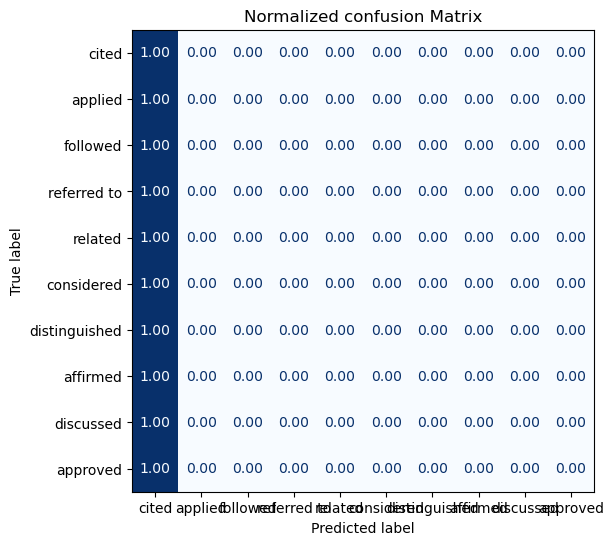

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_pred, y_true, labels_list):
    cm = confusion_matrix(y_true, y_pred, normalize= "true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels_list)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar= False)
    plt.title("Normalized confusion Matrix")
    plt.show()

labels = ClassLabel(names=labels_list)
y_true = labels.str2int(prediction['label'])
plot_confusion_matrix(prediction["prediction"], y_true, labels_list)
